# 내가 해본 이것저것들
변수가 너무나 많아서 일단은 영향력이 있을법한 변수들을 통계적으로 추려보기로 했다.  
경우는 간단하게 승/패로만 비교해보자.(무도 있지만)  
승인 경우와 패인 경우에 따라 각각의 수치 변수들의 평균을 내보자.  
문자열 변수는 제외해야한다 일단 제외부터 해볼까?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df1718 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1718/E0.csv", sep=',', header = 0)
df1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", sep=',', header = 0)
df1516 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/E0.csv", sep=',', header = 0)
df = pd.concat([df1718,df1617,df1516], ignore_index = True)
# df["HTW"] = (df["FTHG"] > df["FTAG"]).astype(int)
# df["HTD"] = (df["FTHG"] == df["FTAG"]).astype(int)
# df["HTL"] = (df["FTHG"] < df["FTAG"]).astype(int)

Dataframe에 describe()를 쓰면 numeric data만 보여주니까 그걸 써서 추출하자.

In [3]:
list(df.describe().loc['mean'].index)

['FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'LBH',
 'LBD',
 'LBA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'Bb1X2',
 'BbMxH',
 'BbAvH',
 'BbMxD',
 'BbAvD',
 'BbMxA',
 'BbAvA',
 'BbOU',
 'BbMx>2.5',
 'BbAv>2.5',
 'BbMx<2.5',
 'BbAv<2.5',
 'BbAH',
 'BbAHh',
 'BbMxAHH',
 'BbAvAHH',
 'BbMxAHA',
 'BbAvAHA',
 'PSCH',
 'PSCD',
 'PSCA']

In [4]:
df.loc[1]

Div               E0
Date        12/08/17
HomeTeam    Brighton
AwayTeam    Man City
FTHG               0
FTAG               2
FTR                A
HTHG               0
HTAG               0
HTR                D
Referee     M Oliver
HS                 6
AS                14
HST                2
AST                4
HF                 6
AF                 9
HC                 3
AC                10
HY                 0
AY                 2
HR                 0
AR                 0
B365H             11
B365D            5.5
B365A           1.33
BWH               11
BWD             5.25
BWA              1.3
IWH                8
              ...   
PSH            10.95
PSD             5.55
PSA             1.34
WHH               10
WHD              4.8
WHA             1.33
VCH               10
VCD              5.5
VCA             1.33
Bb1X2             40
BbMxH           11.5
BbAvH           10.1
BbMxD            5.6
BbAvD           5.25
BbMxA           1.36
BbAvA           1.32
BbOU         

수치화할수 있는 변수들을 FTR(Full Time Result)을 기준으로 통계를 내보도록하자.


In [5]:
grouped = df.groupby('FTR')

홈과 어웨이라는 요소도 비교해봐야겠다.  
단순히 전체데이터 중에서 H(Home win)과 A(Away win)의 갯수를 비교해보면
> H (517) : A (333)
    
홈일때 이길 확률이 517/(517+333) = 517/850 = 0.608xx ~= 61% 정도로 볼수있다.

In [6]:
grouped.describe()

AC                                                   AF             \
     count      mean       std  min  25%  50%  75%   max  count       mean   
FTR                                                                          
A    333.0  4.972973  2.499853  0.0  3.0  5.0  7.0  13.0  333.0  11.075075   
D    290.0  4.644828  2.604506  0.0  3.0  4.0  6.0  13.0  290.0  11.282759   
H    517.0  4.603482  2.796632  0.0  2.0  4.0  6.0  15.0  517.0  11.234043   

     ...    WHD          WHH                                                    
     ...    75%   max  count      mean       std   min   25%   50%   75%   max  
FTR  ...                                                                        
A    ...   3.80   7.5  333.0  4.026997  2.543054  1.17  2.20  3.00  5.50  17.0  
D    ...   3.75   9.0  290.0  2.727448  1.590567  1.11  1.85  2.38  2.86  12.0  
H    ...   4.80  11.0  517.0  2.203346  1.277901  1.10  1.40  1.91  2.40  11.0  

[3 rows x 464 columns]

FTR을 기준으로 각 변수들의 평균값을 보자

In [7]:
means_ftr = grouped.agg(np.mean)
grouped.agg(np.mean)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
FTR,,,,,,,,,,,,,,,,,,,,,
A,0.594595,2.396396,0.261261,1.054054,11.726727,13.300300,3.195195,5.309309,10.477477,11.075075,...,1.933784,24.540541,0.201201,1.998589,1.941411,1.995255,1.934865,4.226667,4.028559,3.131832
D,0.979310,0.979310,0.410345,0.444828,14.113793,11.182759,4.241379,3.593103,10.889655,11.282759,...,1.909241,24.579310,-0.285345,2.008310,1.950966,1.979448,1.923724,2.806759,3.962345,4.505517
H,2.464217,0.522244,1.061896,0.214700,15.334623,9.936170,5.903288,3.017408,10.177950,11.234043,...,2.052631,24.518375,-0.692940,2.005261,1.945222,1.989923,1.933133,2.224720,4.587311,6.685861


In [8]:
ftr = list(means_ftr.index)
values = {}
for index, result in enumerate(ftr):
    values[result] = means_ftr.values[index]
variables = list(means_ftr.columns)

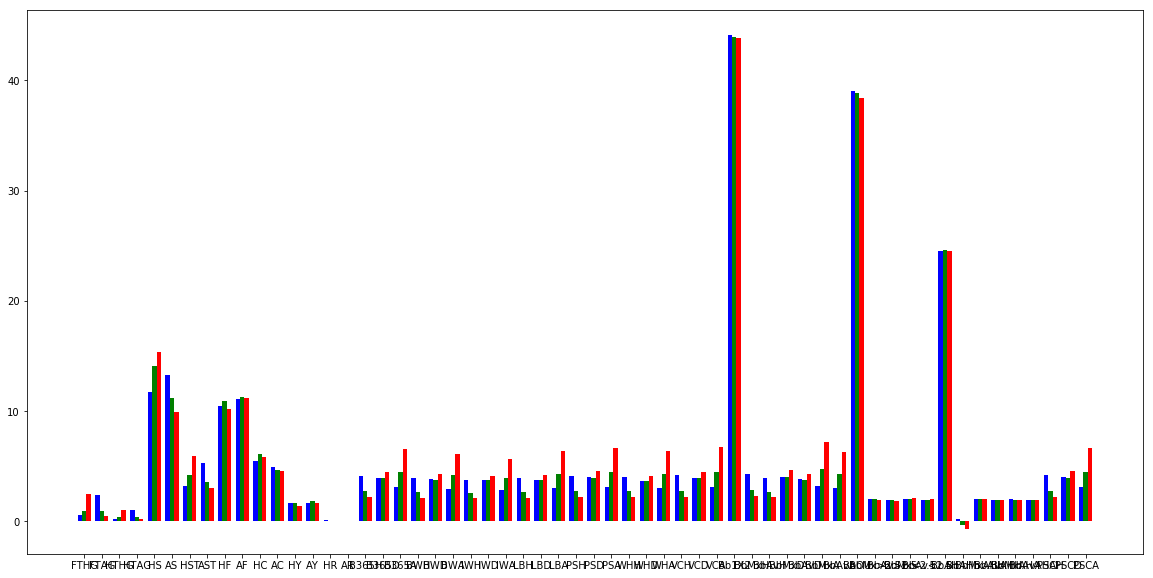

In [9]:

plt.figure(figsize=(20,10))
X=np.arange(58)
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result], color=colors[index], width=0.25)
plt.xticks(X+0.25, variables)
# plt.savefig('ftr_figure.png')

plt.show()

변수가 너무 많아서 그래프를 구별하기가 힘들다.  
변수를 카테고리별로 나눠서 다시 해보자.  

In [25]:
result_data = ['FTHG', 'FTAG', 'HTHG', 'HTAG']
index_r_d = len(result_data)
match_stats = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
index_m_s = index_r_d + len(match_stats)
betting_odds = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA']
index_b_o_3 = index_m_s + 9    # 너무 많으니 앞의 3개 업체만 보자
index_b_o = index_m_s + len(betting_odds)
total_goals_odds= ['BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']
index_t_g_o = index_b_o + len(total_goals_odds)
asian_handicap_odds = ['BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA']
index_a_h_o = index_t_g_o + len(asian_handicap_odds)
closing_odds = ['PSCH', 'PSCD', 'PSCA']
index_c_o = index_a_h_o + len(closing_odds)

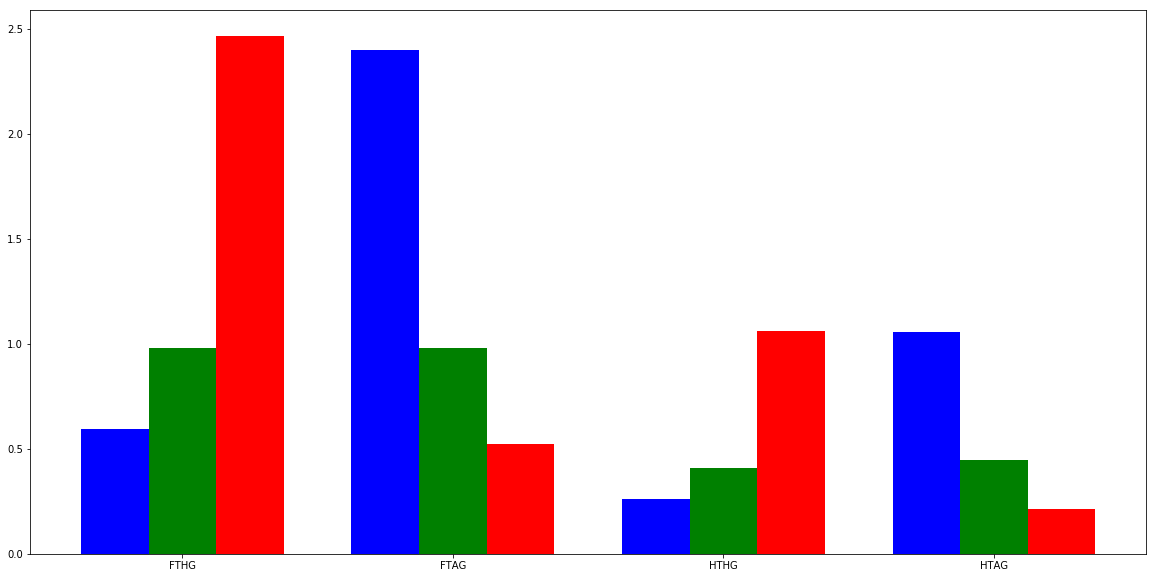

In [27]:
# A = 파랑, D = 초록, H = 파랑

# result_data 부터 보자
plt.figure(figsize=(20,10))
X=np.arange(len(result_data))
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result][:index_r_d], color=colors[index], width=0.25)
plt.xticks(X+0.25, result_data)
# plt.savefig('ftr_figure.png')

plt.show()

경기 결과 데이터를 시각화 해봤다.
홈 기준으로 봤을 때,
- 이길 경우 평균 2.5 골을 넣고
- 비길 경우 평균 1 골을 넣고
- 질 경우 평균 0.6 골 정도를 넣는다
하프타임을 비교해봐도 그냥 풀타임에서 딱 절반한 정도라 큰 의미는 없는듯하다.  
다음으로 넘어가보자.

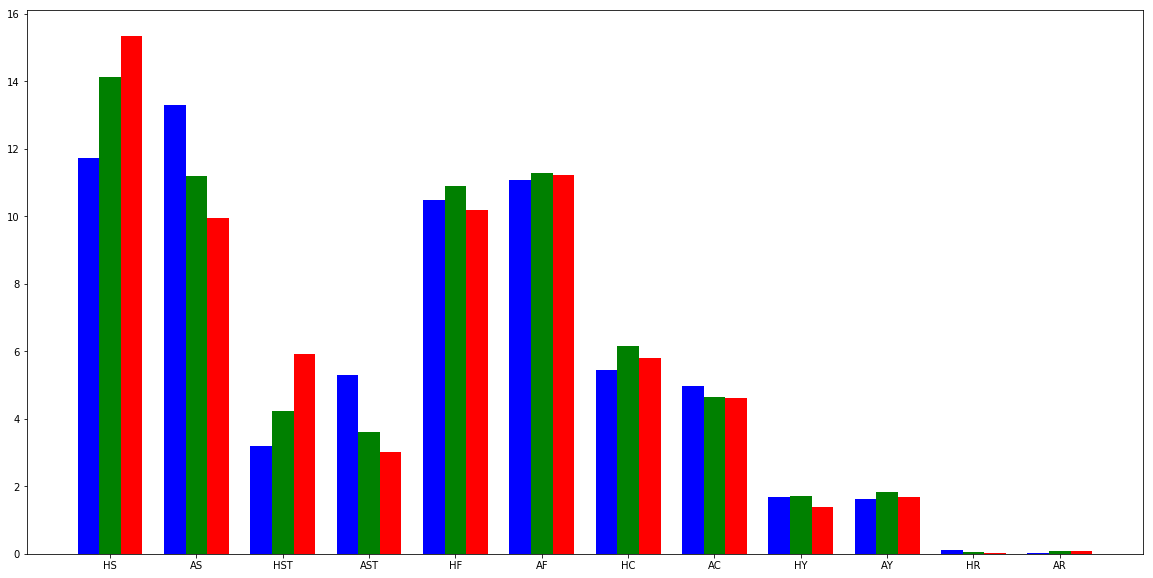

In [28]:
# match_stats
plt.figure(figsize=(20,10))
X=np.arange(len(match_stats))
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result][index_r_d:index_m_s], color=colors[index], width=0.25)
plt.xticks(X+0.25, match_stats)
# plt.savefig('ftr_figure.png')

plt.show()

경기 데이터를 시각화 해봤다.
일단 홈 기준으로 보자. (홈과 어웨이는 수치상에 약간 차이는 있지만 대체로 대칭적 경향을 보인다)

HS(Home Shot


다음으로 넘어가보자.

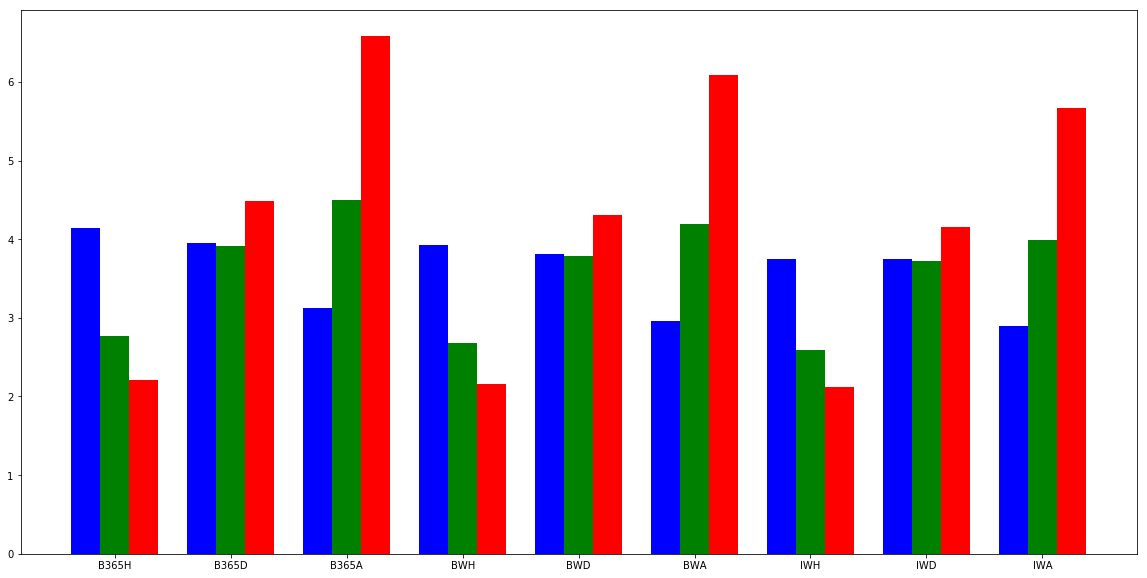

In [30]:
# betting odds_3
plt.figure(figsize=(20,10))
X=np.arange(9)
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result][index_m_s:index_m_s+9], color=colors[index], width=0.25)
plt.xticks(X+0.25, betting_odds[:9])
# plt.savefig('ftr_figure.png')

plt.show()

배팅업체 중 앞의 3개만 시각해봤다.



다음으로 넘어가보자.

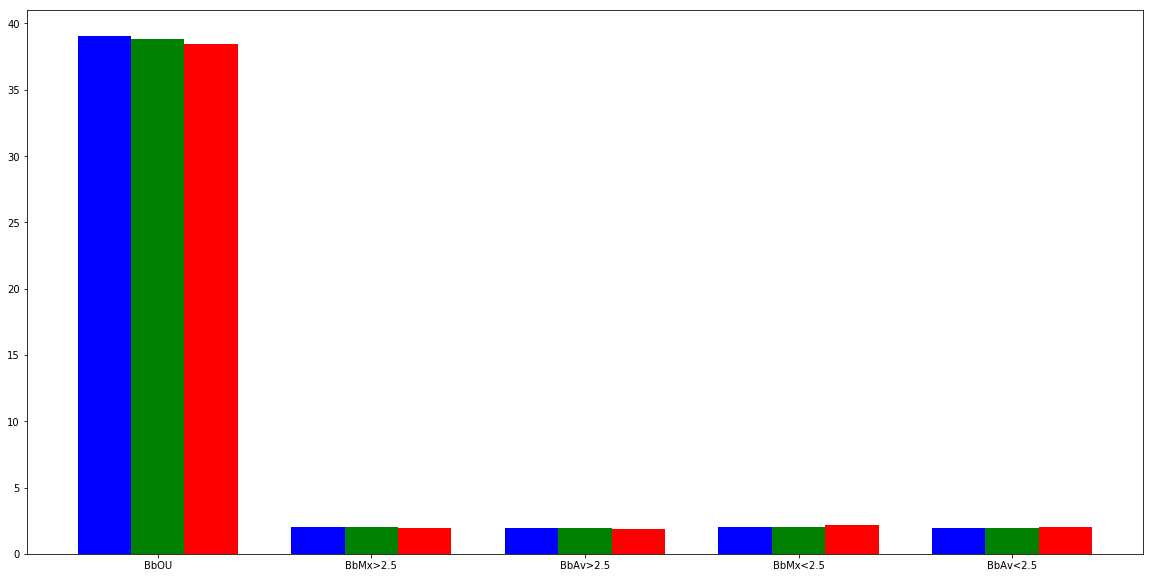

In [32]:
# total goals odds
plt.figure(figsize=(20,10))
X=np.arange(len(total_goals_odds))
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result][index_b_o:index_t_g_o], color=colors[index], width=0.25)
plt.xticks(X+0.25, total_goals_odds)
# plt.savefig('ftr_figure.png')

plt.show()

골 수 배팅을 시각화 해봤다.



다음으로 넘어가보자.

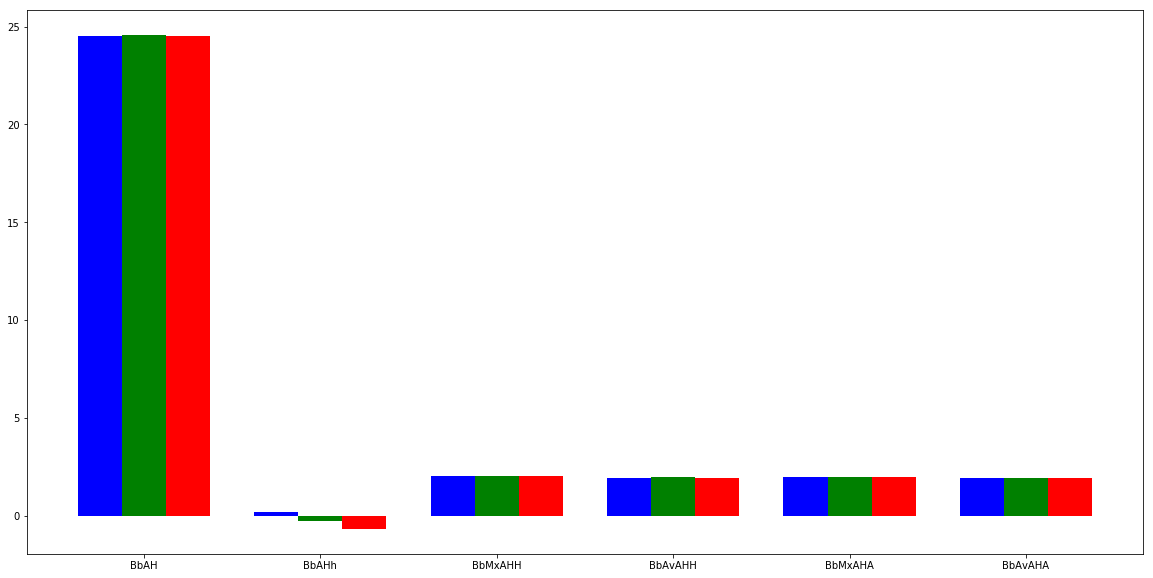

In [34]:
# asian handicap odds
plt.figure(figsize=(20,10))
X=np.arange(len(asian_handicap_odds))
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result][index_t_g_o:index_a_h_o], color=colors[index], width=0.25)
plt.xticks(X+0.25, asian_handicap_odds)
# plt.savefig('ftr_figure.png')

plt.show()

아시안 핸디캡 베팅을 보자. ( 아시안 핸디캡 베팅이 뭔진 모른다. )



다음으로 넘어가보자.

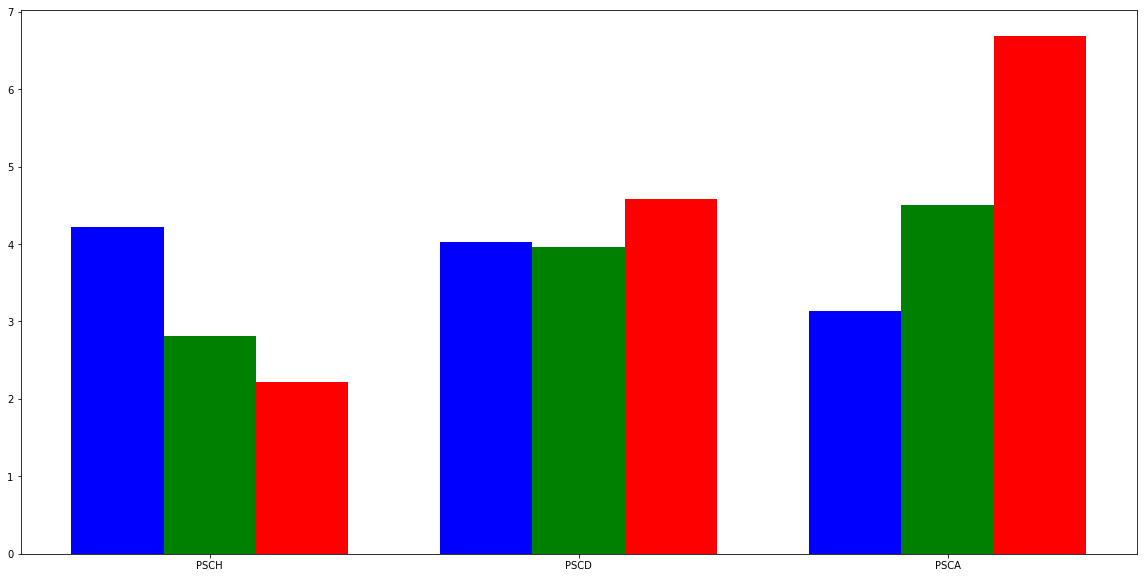

In [35]:
# closing odds
plt.figure(figsize=(20,10))
X=np.arange(len(closing_odds))
colors = ['b','g','r']
for index, result in enumerate(ftr):
    plt.bar(X+0.25*index, values[result][index_a_h_o:index_c_o], color=colors[index], width=0.25)
plt.xticks(X+0.25, closing_odds)
# plt.savefig('ftr_figure.png')

plt.show()

마감 베팅?을 시각화 해봤다.
일단 홈 기준으로 보자.



